<a href="https://colab.research.google.com/github/Giaokeo/Giaokeo/blob/main/NhandientienVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential, load_model

In [3]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [4]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/TienVN/Training',target_size=(200,200),batch_size=3,class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/TienVN/Validation',target_size=(200,200),batch_size=3,class_mode='categorical')

Found 151 images belonging to 11 classes.
Found 83 images belonging to 11 classes.


In [16]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))




model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=100,batch_size=128,validation_data=validation_dataset,verbose=1)

Epoch 1/100
51/51 [==============================] - 2s 25ms/step - loss: 2.4817 - accuracy: 0.1060 - val_loss: 2.4265 - val_accuracy: 0.0843
Epoch 2/100
51/51 [==============================] - 1s 20ms/step - loss: 2.4054 - accuracy: 0.0795 - val_loss: 2.3924 - val_accuracy: 0.0723
Epoch 3/100
51/51 [==============================] - 1s 20ms/step - loss: 2.3917 - accuracy: 0.1192 - val_loss: 2.3926 - val_accuracy: 0.0602
Epoch 4/100
51/51 [==============================] - 1s 20ms/step - loss: 2.3828 - accuracy: 0.1192 - val_loss: 2.3801 - val_accuracy: 0.1084
Epoch 5/100
51/51 [==============================] - 1s 20ms/step - loss: 2.3836 - accuracy: 0.1325 - val_loss: 2.3990 - val_accuracy: 0.0964
Epoch 6/100
51/51 [==============================] - 1s 20ms/step - loss: 2.3831 - accuracy: 0.0993 - val_loss: 2.3721 - val_accuracy: 0.0843
Epoch 7/100
51/51 [==============================] - 1s 20ms/step - loss: 2.3869 - accuracy: 0.1325 - val_loss: 2.3823 - val_accuracy: 0.1084
Epoch 

In [17]:
dir_path='/content/drive/MyDrive/TienVN/Testing'

for i in os.listdir(dir_path):
  print(i)

7.jpg
11.jpg
6.jpg
9.jpg
8.jpg
10.jpg
3.jpg
4.jpg
1.jpg
2.jpg
5.jpg


In [18]:
validation_dataset.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

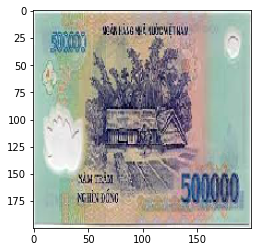

5000


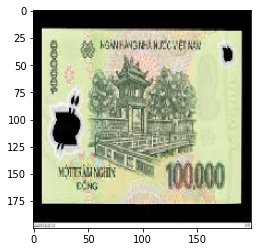

500


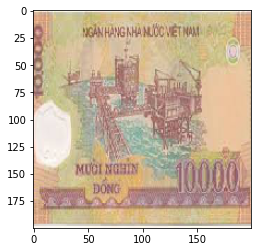

10000


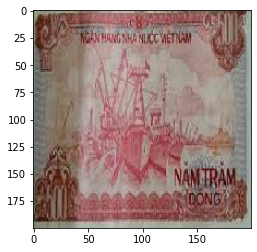

500


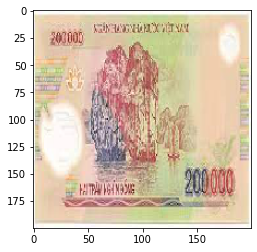

200000


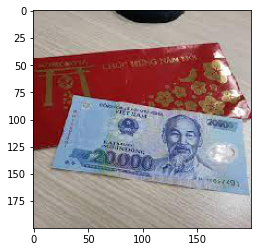

500000


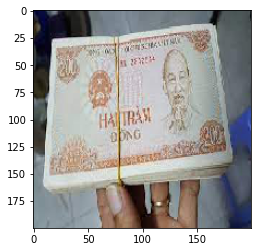

50000


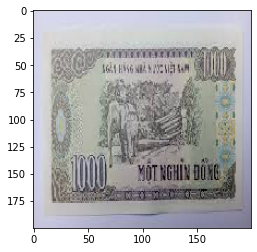

1000


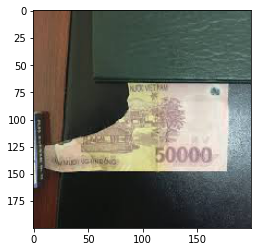

200000


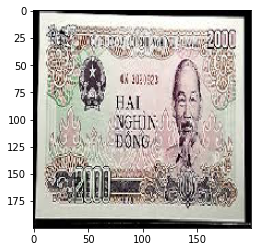

2000


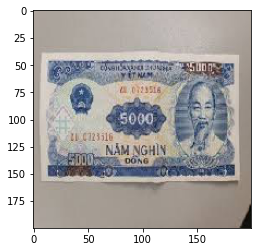

5000


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

path = '/content/drive/MyDrive/TienVN/Testing'

for i in range (11):
    img = load_img(path+'//'+str(i+1)+'.jpg',target_size=(200,200))
    plt.imshow(img)
    plt.show()

    img = img_to_array(img)
    img=np.reshape(img,(1,200,200,3))
    img = img.astype('float32')
    img = img/255
    predict =  np.argmax(model.predict(img))
    if predict==0:
      print("1000")
    elif predict==1: 
      print("10000")
    elif predict==2: 
      print("100000")
    elif predict==3: 
      print("200")
    elif predict==4: 
      print("2000")
    elif predict==5: 
      print("20000")
    elif predict==6: 
      print("200000")
    elif predict==7: 
      print("500")
    elif predict==8: 
      print("5000")
    elif predict==9: 
      print("50000")
    elif predict==10:
      print("500000")  